In [2]:
import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

print("This process may take 5 to 10 minutes, depending on the performance of your computer.\n\n\n")
number="0123456789"
# CSV files names:
csv_files=["Monday-WorkingHours.pcap_ISCX",
        "Tuesday-WorkingHours.pcap_ISCX",
        "Wednesday-workingHours.pcap_ISCX",
        "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX",
        "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX",
        "Friday-WorkingHours-Morning.pcap_ISCX",
        "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX",
        "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX",]

# Headers of column
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","faulty-Fwd Header Length","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]

main_labels2=main_labels
main_labels=( ",".join( i for i in main_labels ) )
main_labels=main_labels+"\n"
flag=True
for i in range(len(csv_files)):
    ths = open(str(i)+".csv", "w")
    ths.write(main_labels)
    with open("./CSVs/"+csv_files[i]+".csv", "r") as file:
        while True:
            try:
                line=file.readline()
                if  line[0] in number:# this line eliminates the headers of CSV files and incomplete streams .
                    if " – " in str(line): ##  if there is "–" character ("–", Unicode code:8211) in the flow ,  it will be chanced with "-" character ( Unicode code:45).
                        line=(str(line).replace(" – "," - "))
                    line=(str(line).replace("inf","0"))
                    line=(str(line).replace("Infinity","0"))
                    line=(str(line).replace("NaN","0"))
                     
                    ths.write(str(line))
                else:
                    continue                       
            except:
                break
    ths.close()
 
 
    df=pd.read_csv(str(i)+".csv",low_memory=False)
    df=df.fillna(0)

    string_features=["Flow Bytes/s","Flow Packets/s"]
    for ii in string_features: #Some data in the "Flow Bytes / s" and "Flow Packets / s" columns are not numeric. Fixing this bug in this loop
        df[ii]=df[ii].replace('Infinity', -1)
        df[ii]=df[ii].replace('NaN', 0)
        number_or_not=[]
        for iii in df[ii]:
            try:
                k=int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii]=number_or_not



    string_features=[]
    for j in main_labels2: # In this section, non-numeric (string and / or categorical) properties (columns) are detected.
        if df[j].dtype=="object":
            string_features.append(j)
    try:
        string_features.remove('Label')#The "Label" property was removed from the list. Because it has to remain "categorical" for using with different machine learning approach.
    except:
        print("error!")
    labelencoder_X = preprocessing.LabelEncoder()



    for ii in string_features: ## In this loop, non-numeric (string and/or categorical) properties converted to numeric features.
        try:
            df[ii]=labelencoder_X.fit_transform(df[ii])
        except:
            df[ii]=df[ii].replace('Infinity', -1)
    df=df.drop(main_labels2[61], axis=1) ## Column 61 is deleted because it is unnecessary, column 41 ("Fwd Header Length" feature) had be mistakenly rewritten.



    ##All CSV files are merged into a single file.
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")
    os.remove(str(i)+".csv")
    print("The pre-processing phase of the ",csv_files[i]," file is completed.\n")
    

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

This process may take 5 to 10 minutes, depending on the performance of your computer.



The pre-processing phase of the  Monday-WorkingHours.pcap_ISCX  file is completed.

The pre-processing phase of the  Tuesday-WorkingHours.pcap_ISCX  file is completed.

The pre-processing phase of the  Wednesday-workingHours.pcap_ISCX  file is completed.

The pre-processing phase of the  Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX  file is completed.

The pre-processing phase of the  Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX  file is completed.

The pre-processing phase of the  Friday-WorkingHours-Morning.pcap_ISCX  file is completed.

The pre-processing phase of the  Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX  file is completed.

The pre-processing phase of the  Friday-WorkingHours-Afternoon-DDos.pcap_ISCX  file is completed.

mission accomplished!
Total operation time: =  195.60709261894226 seconds


BENIGN                        2359289
DoS Hulk                       231073
PortScan                       158930
DDoS                            41835
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack - Brute Force         1507
Web Attack - XSS                  652
Infiltration                       36
Web Attack - Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


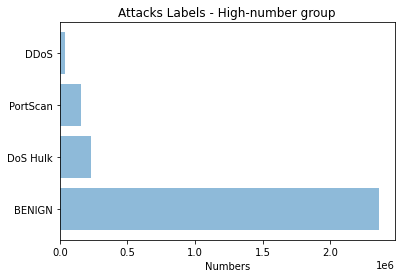

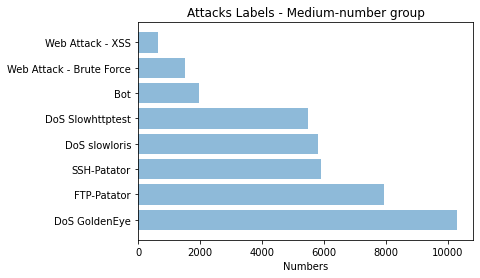

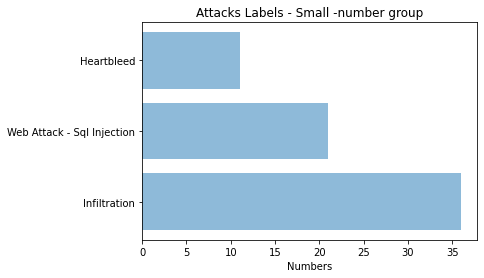

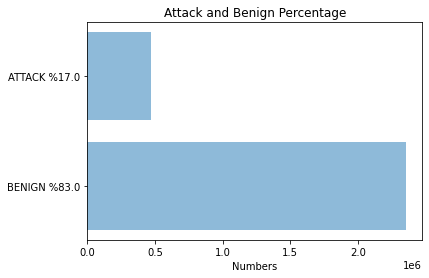

mission accomplished!
Total operation time: =  9.516594886779785 seconds


In [3]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()


df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())





key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attacak=0
benign=0


## In this section, the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attacak+=values[i]
        
key =[benign,attacak]


#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attacak),2)*100),
        "ATTACK %"+str(round(attacak/(benign+attacak),2)*100)]
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")



print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

In [4]:
import random
import os
import pandas as pd
import time
seconds = time.time()
%matplotlib inline

def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Tthe folder could not be created!")
        


print("This process may take 3 to 8 minutes, depending on the performance of your computer.\n\n\n")




# Headers of column
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]
main_labels=( ",".join( i for i in main_labels ) )

attacks=["BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack – Brute Force", "Web Attack – Sql Injection", "Web Attack – XSS"]
folder("./attacks/")

benign=2359289

dict_attack={
"Bot":1966,
"DDoS":41835,
"DoS GoldenEye":10293,
"DoS Hulk":231073,
"DoS Slowhttptest":5499,
"DoS slowloris":5796,
"FTP-Patator":7938,
"Heartbleed":11,
"Infiltration":36,
"PortScan":158930,
"SSH-Patator":5897,
"Web Attack - Brute Force":1507,
"Web Attack - XSS":652,
"Web Attack - Sql Injection":21}



for i in dict_attack: # in this section, a file is opened for each attack type and is recorded at a random benign flow.
    a,b=0,0
    ths = open(".\\attacks\\"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(benign/(dict_attack[i]*(7/3)))
    with open("all_data.csv", "r") as file:
        while True:
            try:
                line=file.readline()
                line=line[:-1]
                k=line.split(",")
                if k[83]=="BENIGN":
                    rnd=random.randint(1,benign_num)
                    if rnd==1:
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[83]==i:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue                       
            except:
                break
    ths.close()
    print(i ,"file is completed\n attack:%d\n benign:%d\n\n\n " %(a,b))

    
##All web attack files are merged into a single file.
webs=["Web Attack - Brute Force","Web Attack - XSS","Web Attack - Sql Injection"]
flag=True
for i in webs:
    df=pd.read_csv(".\\attacks\\"+str(i)+".csv")
    if flag:
        df.to_csv('.\\attacks\\Web Attack.csv' ,index = False)
        flag=False
    else:
        df.to_csv('.\\attacks\\Web Attack.csv' ,index = False,header=False,mode="a")
    os.remove(".\\attacks\\"+str(i)+".csv")


print("mission accomplished!")
print("operation time: = ",time.time()- seconds ,"seconds")

This process may take 3 to 8 minutes, depending on the performance of your computer.



Bot file is completed
 attack:1966
 benign:4519


 
DDoS file is completed
 attack:41835
 benign:98431


 
DoS GoldenEye file is completed
 attack:10293
 benign:23933


 
DoS Hulk file is completed
 attack:231073
 benign:590409


 
DoS Slowhttptest file is completed
 attack:5499
 benign:12875


 
DoS slowloris file is completed
 attack:5796
 benign:13594


 
FTP-Patator file is completed
 attack:7938
 benign:18519


 
Heartbleed file is completed
 attack:11
 benign:22


 
Infiltration file is completed
 attack:36
 benign:69


 
PortScan file is completed
 attack:158930
 benign:393172


 
SSH-Patator file is completed
 attack:5897
 benign:13881


 
Web Attack - Brute Force file is completed
 attack:1507
 benign:3594


 
Web Attack - XSS file is completed
 attack:652
 benign:1631


 
Web Attack - Sql Injection file is completed
 attack:21
 benign:53


 
mission accomplished!
operation time: =  301.343

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.56            0.7             0.68            0.56            0.009          
Bot               QDA                0.67            0.74            0.76            0.67            0.0098         
Bot               Random Forest      0.97            0.96            0.96            0.96            0.0412         
Bot               ID3                0.97            0.95            0.97            0.96            0.0126         
Bot               AdaBoost           0.98            0.97            0.98            0.97            0.3            
Bot               MLP                0.65            0.56            0.55            0.54            0.5508         
Bot               Nearest Neighbors  0.96            0.94            0.95            0.95            0.0822         


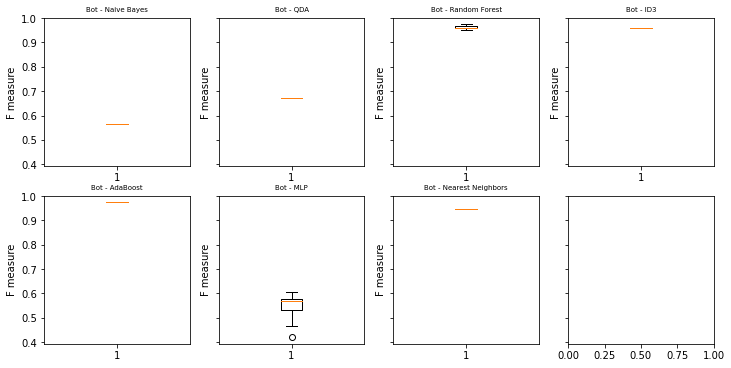


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.78            0.74            0.69            0.71            0.0592         
DDoS              QDA                0.43            0.67            0.59            0.41            0.0723         
DDoS              Random Forest      0.96            0.95            0.97            0.96            0.5369         
DDoS              ID3                0.96            0.94            0.97            0.96            0.2089         
DDoS              AdaBoost           0.96            0.95            0.97            0.96            3.3997         
DDoS              MLP                0.73            0.67            0.64            0.59            18.4942        
DDoS              Nearest Neighbors  0.92            0.91            0.92  

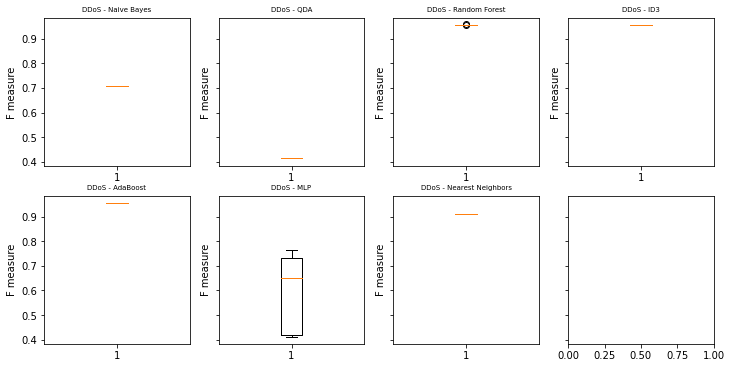


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.82            0.82            0.74            0.76            0.019          
DoS GoldenEye     QDA                0.7             0.74            0.78            0.7             0.0192         
DoS GoldenEye     Random Forest      0.99            0.99            0.99            0.99            0.1635         
DoS GoldenEye     ID3                0.99            0.99            0.99            0.99            0.0595         
DoS GoldenEye     AdaBoost           0.98            0.98            0.98            0.98            1.0809         
DoS GoldenEye     MLP                0.7             0.72            0.74            0.67            4.8309         
DoS GoldenEye     Nearest Neighbors  0.97            0.96            0.97  

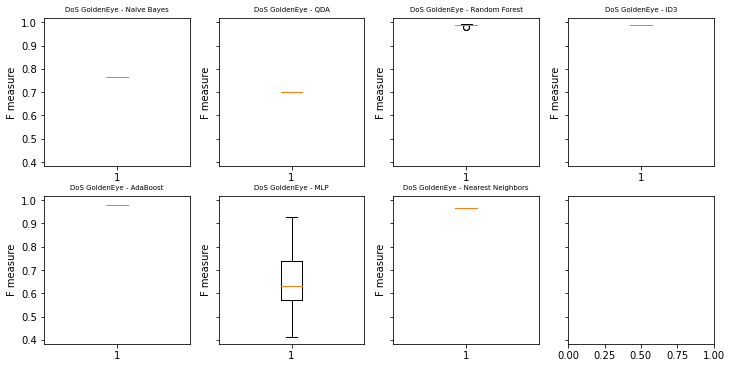


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.34            0.65            0.54            0.3             0.4398         
DoS Hulk          QDA                0.41            0.66            0.59            0.4             0.4954         
DoS Hulk          Random Forest      0.93            0.94            0.89            0.91            4.2008         
DoS Hulk          ID3                0.96            0.95            0.96            0.95            1.6921         
DoS Hulk          AdaBoost           0.96            0.95            0.95            0.95            21.8855        
DoS Hulk          MLP                0.95            0.94            0.94            0.94            71.8028        
DoS Hulk          Nearest Neighbors  0.96            0.95            0.96  

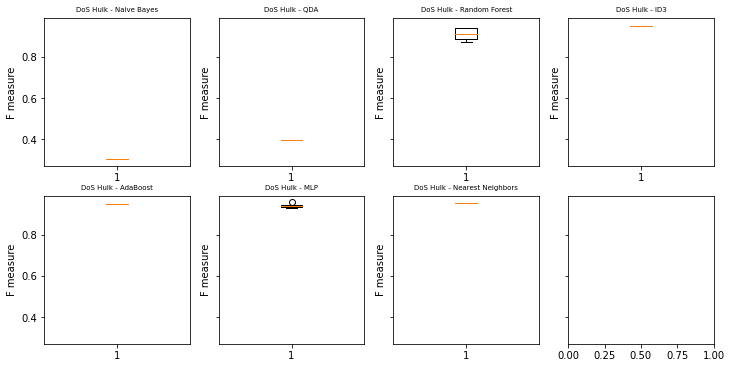


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.42            0.61            0.56            0.41            0.014          
DoS Slowhttptest  QDA                0.44            0.62            0.58            0.43            0.0131         
DoS Slowhttptest  Random Forest      0.98            0.98            0.97            0.98            0.0673         
DoS Slowhttptest  ID3                0.97            0.98            0.96            0.97            0.0253         
DoS Slowhttptest  AdaBoost           1.0             1.0             1.0             1.0             0.4097         
DoS Slowhttptest  MLP                0.85            0.83            0.88            0.84            2.146          
DoS Slowhttptest  Nearest Neighbors  0.99            0.99            0.99  

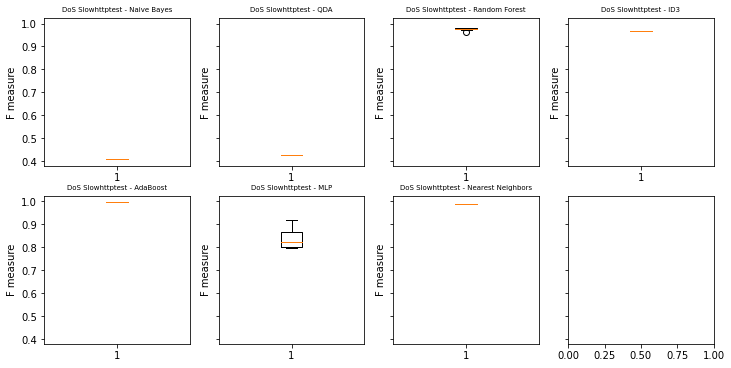


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.42            0.67            0.59            0.4             0.0121         
DoS slowloris     QDA                0.46            0.65            0.61            0.46            0.0131         
DoS slowloris     Random Forest      0.94            0.93            0.93            0.93            0.068          
DoS slowloris     ID3                0.96            0.97            0.94            0.95            0.025          
DoS slowloris     AdaBoost           0.95            0.96            0.93            0.94            0.4485         
DoS slowloris     MLP                0.8             0.69            0.75            0.7             2.0117         
DoS slowloris     Nearest Neighbors  0.95            0.94            0.94  

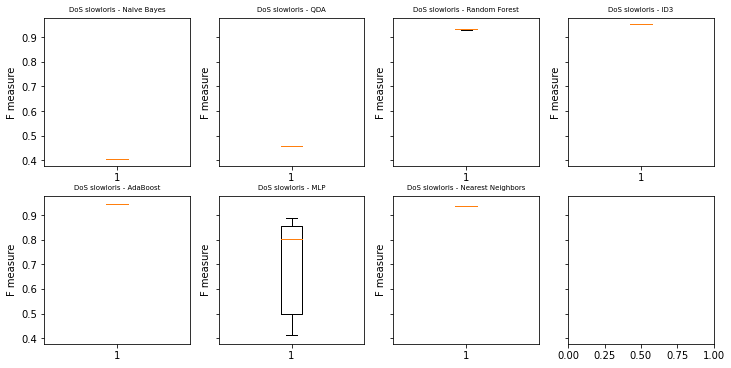


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        1.0             1.0             1.0             1.0             0.0165         
FTP-Patator       QDA                1.0             1.0             1.0             1.0             0.015          
FTP-Patator       Random Forest      1.0             1.0             1.0             1.0             0.0686         
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.022          
FTP-Patator       AdaBoost           1.0             1.0             1.0             1.0             0.4914         
FTP-Patator       MLP                1.0             1.0             1.0             1.0             4.8029         
FTP-Patator       Nearest Neighbors  1.0             1.0             1.0   

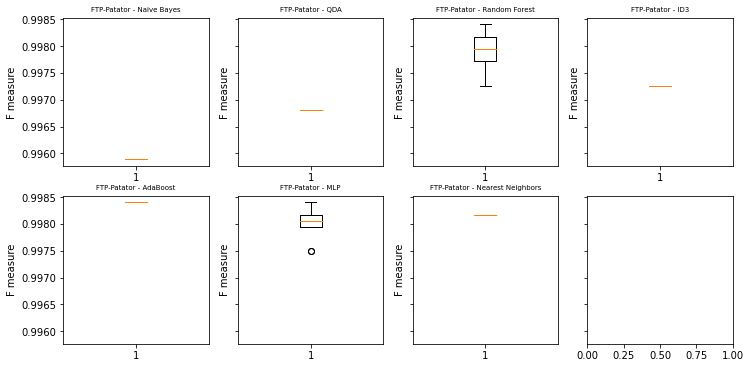


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0079         
Heartbleed        QDA                1.0             1.0             1.0             1.0             0.0079         
Heartbleed        Random Forest      1.0             1.0             1.0             1.0             0.0204         
Heartbleed        ID3                0.97            0.98            0.97            0.97            0.0063         
Heartbleed        AdaBoost           0.91            0.94            0.9             0.91            0.0076         
Heartbleed        MLP                0.69            0.66            0.68            0.61            0.0385         
Heartbleed        Nearest Neighbors  1.0             1.0             1.0   

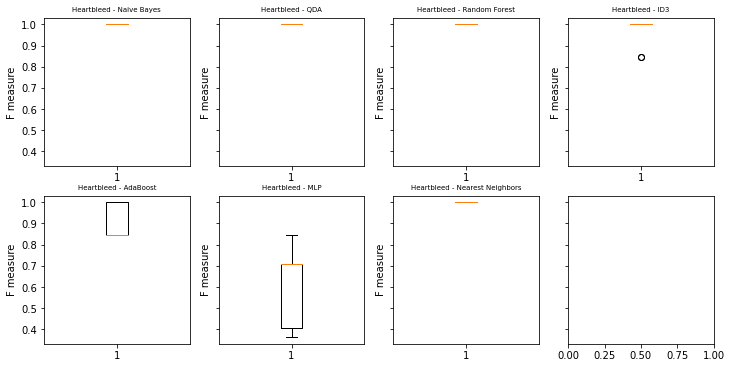


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Infiltration      Naive Bayes        0.95            0.9             0.97            0.93            0.009          
Infiltration      QDA                0.95            0.9             0.97            0.93            0.0072         
Infiltration      Random Forest      1.0             1.0             1.0             1.0             0.0208         
Infiltration      ID3                1.0             1.0             1.0             1.0             0.0065         
Infiltration      AdaBoost           1.0             1.0             1.0             1.0             0.0786         
Infiltration      MLP                0.36            0.47            0.54            0.3             0.0221         
Infiltration      Nearest Neighbors  0.9             0.85            0.85  

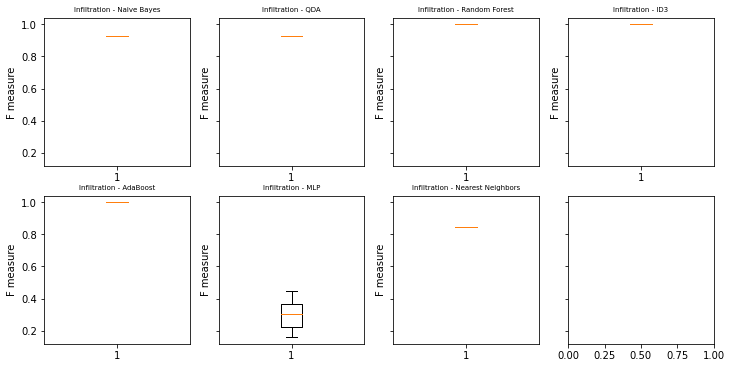


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.43            0.66            0.6             0.42            0.2411         
PortScan          QDA                0.84            0.82            0.88            0.82            0.2793         
PortScan          Random Forest      1.0             1.0             0.99            1.0             2.2969         
PortScan          ID3                1.0             1.0             1.0             1.0             0.7363         
PortScan          AdaBoost           1.0             0.99            0.99            0.99            14.627         
PortScan          MLP                0.72            0.67            0.53            0.45            28.9679        
PortScan          Nearest Neighbors  1.0             1.0             1.0   

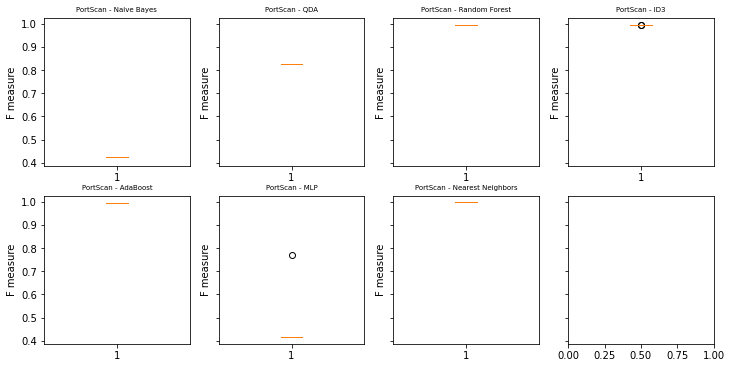


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.4             0.67            0.58            0.38            0.0176         
SSH-Patator       QDA                0.46            0.67            0.62            0.46            0.0132         
SSH-Patator       Random Forest      0.96            0.94            0.96            0.95            0.0807         
SSH-Patator       ID3                0.96            0.94            0.97            0.95            0.0307         
SSH-Patator       AdaBoost           0.96            0.94            0.97            0.95            0.5115         
SSH-Patator       MLP                0.86            0.83            0.84            0.83            0.9143         
SSH-Patator       Nearest Neighbors  0.96            0.94            0.96  

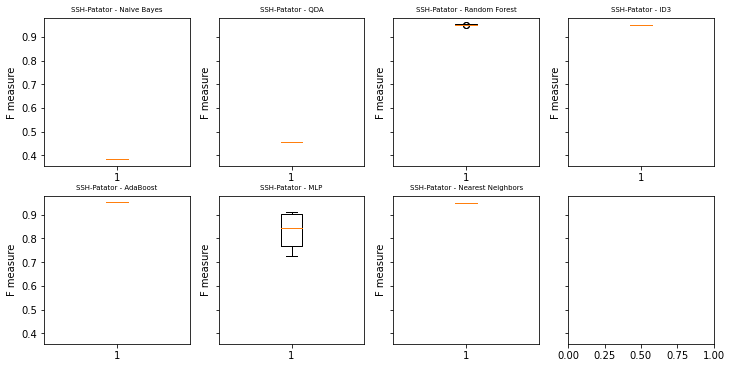


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        0.74            0.76            0.82            0.73            0.0126         
Web Attack        QDA                0.83            0.82            0.88            0.82            0.0095         
Web Attack        Random Forest      0.96            0.97            0.95            0.96            0.0444         
Web Attack        ID3                0.97            0.97            0.95            0.96            0.0177         
Web Attack        AdaBoost           0.97            0.97            0.95            0.96            0.2468         
Web Attack        MLP                0.69            0.59            0.57            0.52            0.4457         
Web Attack        Nearest Neighbors  0.93            0.91            0.92  

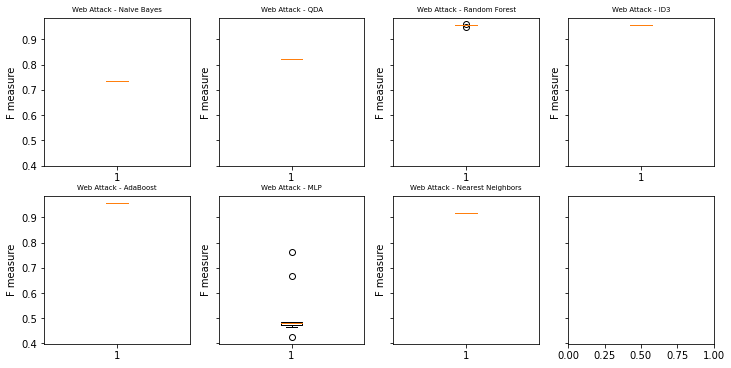


------------------------------------------------------------------------------------------------------


mission accomplished!
Total operation time: =  2459.2085316181183 seconds


In [1]:


from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")


result="./results/results_1.csv" #a CSV file is named in which the results are saved.
csv_files=os.listdir("attacks")# CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
path=".\\attacks\\"
repetition=10


def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

folder_name="./results/"
folder(folder_name)
folder_name="./results/result_graph_1/"
folder(folder_name)


#The machine learning algorithms to be used are defined in a dictionary (ml_list).
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Nearest Neighbors":KNeighborsClassifier(3)}



# the features to be used for each attack type is defined in a dictionary(features).
# the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
"DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
"DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
"DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
"DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
"DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
"FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
"Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
"Infiltration":["Fwd Packet Length Max","Fwd Packet Length Mean","Flow Duration","Total Length of Fwd Packets","Label"],
"PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
"SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
"Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"]}

seconds=time.time()#time stamp for all processing time



with open(result, "w", newline="",encoding="utf-8") as f:#a CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])




for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    a=[]
    
    feature_list=list(features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    
    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    
    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test). 
                test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary                                                                          
            clf.fit(X_train, y_train)
            predict =clf.predict(X_test)
        
            #makes "classification report" and assigns the precision, f-measure, and recall values.s.    
                  
            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            
            
            
            
            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )


            
        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

        with open(result, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
        a.append(f1)


     # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.

     
    ml=["Naive Bayes","QDA","Random Forest","ID3","AdaBoost","MLP","Nearest Neighbors"]
    temp=0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
            axes[c, b].boxplot(a[temp] )
            axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
            axes[c, b].set_ylabel(("F measure"))
            temp+=1
            if temp==7:
                break
        if temp==7:
            break
    plt.savefig(folder_name+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")
    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.87            0.79            0.7             0.73            2.2419         


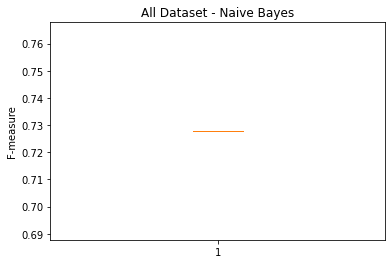

all_data          QDA                0.88            0.82            0.69            0.73            2.1034         


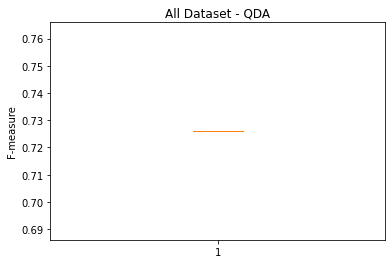

all_data          MLP                0.88            0.85            0.67            0.71            381.0545       


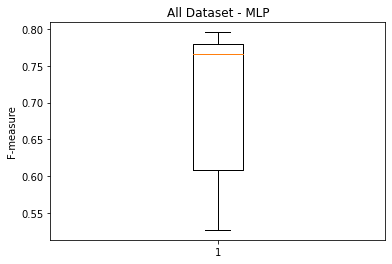

all_data          Random Forest      0.94            0.96            0.83            0.88            24.2292        


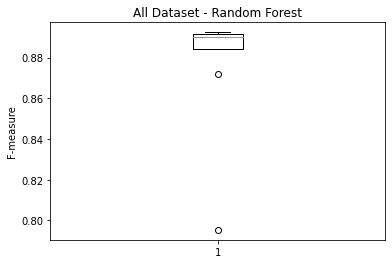

all_data          ID3                0.95            0.93            0.89            0.91            11.9405        


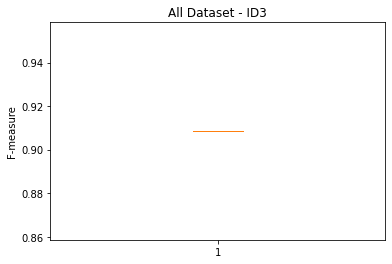

all_data          AdaBoost           0.94            0.93            0.85            0.88            212.1024       


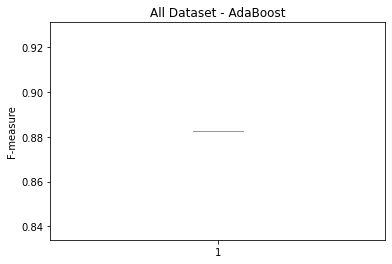

all_data          Nearest Neighbors  0.97            0.94            0.95            0.94            248.7821       


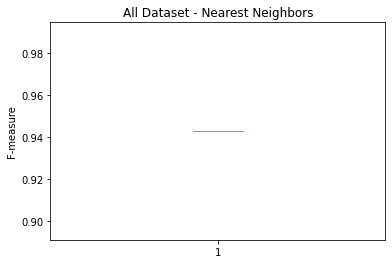

mission accomplished!
Total operation time: =  8844.588582992554 seconds


In [1]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")



def folder(f_name): #this function creates a folder named "feaure_graph" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

result="./results/results_Final.csv" #a CSV file is named in which the results are saved.
csv_files=["all_data.csv"]# CSV files names: #The names of the dataset files (csv_files).
path=""
repetition=10


def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

folder_name="./results/"
folder(folder_name)
folder_name="./results/result_graph_Final/"
folder(folder_name)



# the 20 features selected by the file "04_2_feature_selection_for_attack_files.py" are used here. (+ Label Feature)
usecols=["Bwd Packet Length Std","Flow Bytes/s","Total Length of Fwd Packets","Fwd Packet Length Std","Flow IAT Std",
"Flow IAT Min","Fwd IAT Total","Flow Duration","Bwd Packet Length Max","Flow IAT Max","Flow IAT Mean","Total Length of Bwd Packets",
"Fwd Packet Length Min","Bwd Packet Length Mean","Flow Packets/s","Fwd Packet Length Mean","Total Backward Packets","Total Fwd Packets",
"Fwd Packet Length Max","Bwd Packet Length Min",'Label']




#The machine learning algorithms to be used are defined in a dictionary (ml_list).
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
"Nearest Neighbors":KNeighborsClassifier(3)}




# the features to be used for Random Forest,ID3,AdaBoost,Nearest Neighbors is defined in a list(others).
# the first 7 of the features created by the file "04_2_feature_selection_for_attack_files.py" are used here.
others=["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
     "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total"]

#In this part different sets of properties for machine learning methods are defined as follows:
#For "Naive Bayes", "QDA", and "MLP", each method has a different feature list.
#other algorithms (Random Forest, ID3, AdaBoost, and Nearest Neighbors) use
#the first 7 of the features created by the file "04_2_feature_selection_for_attack_files.py" are used here.
algorithms_features={"Naive Bayes":['Bwd Packet Length Std', 'Total Length of Fwd Packets', 'Flow IAT Min', 'Fwd Packet Length Min', 'Flow Packets/s', 'Fwd Packet Length Mean'] ,
"QDA":['Bwd Packet Length Std', 'Flow Bytes/s', 'Total Length of Fwd Packets', 'Flow IAT Min'], 
"MLP":['Bwd Packet Length Std', 'Flow Bytes/s', 'Total Length of Fwd Packets', 'Fwd Packet Length Std',
'Flow IAT Min', 'Bwd Packet Length Max','Fwd Packet Length Min', 'Bwd Packet Length Mean',
'Total Backward Packets', 'Total Fwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Min'],


#these algorithms use the features in the "others" list
"Random Forest":others,
"ID3" :others,
"AdaBoost":others,
"Nearest Neighbors":others}

seconds=time.time()#time stamp for all processing time




with open(result, "w", newline="",encoding="utf-8") as f:#a CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])

for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    feature_list=usecols
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    
    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')    
    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        X = df[algorithms_features[ii]]
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm. 
                test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary                                                                          
            clf.fit(X_train, y_train)
            predict =clf.predict(X_test)
        
            #makes "classification report" and assigns the precision, f-measure, and recall values.s.    
            

            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )


            
        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the avarage result of the ten repetitions is printed on the screen.

        with open(result, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file



        # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.
        plt.boxplot(f1)
        plt.title("All Dataset - " +str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name+j[0:-4]+str(ii)+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
        plt.show()# you can remove the # sign if you want to see the graphics simultaneously
        
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

In [2]:

#%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score




            
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time
seconds = time.time()


#list of all columns to be imported
# the 20 features selected by the file "04_2_feature_selection_for_attack_files.py" are used here. (+ Label Feature)
features=["Bwd Packet Length Std","Flow Bytes/s","Total Length of Fwd Packets","Fwd Packet Length Std",
"Flow IAT Std","Flow IAT Min","Fwd IAT Total","Flow Duration","Bwd Packet Length Max","Flow IAT Max",
"Flow IAT Mean","Total Length of Bwd Packets","Fwd Packet Length Min","Bwd Packet Length Mean",
"Flow Packets/s","Fwd Packet Length Mean","Total Backward Packets","Total Fwd Packets","Fwd Packet Length Max",
"Bwd Packet Length Min",'Label']
    
df=pd.read_csv('all_data.csv',usecols=features)#CSV rading



print ('%-17s %-17s ' % ("Feature Number","Feature"))# print output header
for i in range(len(features)-1):
    print ('%-17s %-17s' % (i+1,features[i]))# print features  and feature numbers 


print ('\n\n\n')

attack_or_not=[]
for i in df.iloc[:,-1]:
    if i =="BENIGN":#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        attack_or_not.append(1)
    else:
        attack_or_not.append(0)
df.iloc[:,-1]=attack_or_not
y = df.iloc[:, -1].values #labes-y
my_list=[]


least=0



ml_list={#The machine learning algorithms to be used are defined in a dictionary (ml_list).
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
##"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
##"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
##"AdaBoost":AdaBoostClassifier(),
##"Nearest Neighbors":KNeighborsClassifier(3),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)}


features.pop()#the Label tag is removed, no need any more
print ('%-17s %-30s %-10s  %-10s %-15s ' % ("ML algorithm","Feature Name","F1-score","Accuracy", "Feature List"))# print output header
for j in ml_list: # run for every machine learning.  
    my_list=[]
    for i in features: ## run for every  feature  
        my_list.append(i)
        X = df.loc[:, my_list].values # data

        ## cross-validation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
       
        #machine learning algorithm is applied in this section
        clf = ml_list[j]   #                                                                       
        clf.fit(X_train, y_train)
        predict =clf.predict(X_test)
        f1=clf.score(X_test, y_test)
        result=f1_score(y_test, predict, average='macro')
        accuracy=round(clf.score(X_test, y_test),2)
        temp="["
       
        for ii in my_list: 
            temp+=str(my_list.index(ii)+1)+", " #translate property list to sequence number for less space

       
        if result>=least:# If the F-criterion is equal to or greater than the highest value previously accessed, keep the new feature. 
            least=result
            print ('%-17s %-30s %-10s  %-10s %-15s %-15s ' % (j,i,result,accuracy ,temp, "------> New feature found!!!"))

        else:#If not, remove it from the list
            my_list.remove(my_list[len(my_list)-1])
            print ('%-17s %-30s %-10s  %-10s %-15s ' % (j,i,result,accuracy ,temp))
    print("F1=" ,least,j," The most efficient feature list =",my_list,"\n\n") #print maximum F1 and the most efficient feature list




print("mission accomplished!")
print("operation time: = ",time.time()- seconds ,"secomds")

Feature Number    Feature           
1                 Bwd Packet Length Std
2                 Flow Bytes/s     
3                 Total Length of Fwd Packets
4                 Fwd Packet Length Std
5                 Flow IAT Std     
6                 Flow IAT Min     
7                 Fwd IAT Total    
8                 Flow Duration    
9                 Bwd Packet Length Max
10                Flow IAT Max     
11                Flow IAT Mean    
12                Total Length of Bwd Packets
13                Fwd Packet Length Min
14                Bwd Packet Length Mean
15                Flow Packets/s   
16                Fwd Packet Length Mean
17                Total Backward Packets
18                Total Fwd Packets
19                Fwd Packet Length Max
20                Bwd Packet Length Min




ML algorithm      Feature Name                   F1-score    Accuracy   Feature List    
Naive Bayes       Bwd Packet Length Std          0.7258939444619579  0.88       [1,        